In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBRFClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

from sklearn.preprocessing import LabelEncoder

from imblearn.over_sampling import RandomOverSampler
import warnings
warnings.filterwarnings("ignore")

In [2]:
# !pip install imblearn

In [3]:
data= pd.read_csv('Breast_Cancer.csv')

Explore Data

In [4]:
data.head()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive


In [5]:
data.shape

(4024, 16)

In [6]:
data.isna().sum()

Age                       0
Race                      0
Marital Status            0
T Stage                   0
N Stage                   0
6th Stage                 0
differentiate             0
Grade                     0
A Stage                   0
Tumor Size                0
Estrogen Status           0
Progesterone Status       0
Regional Node Examined    0
Reginol Node Positive     0
Survival Months           0
Status                    0
dtype: int64

In [7]:
for i in data.columns:
    unique_values = np.unique(data[i])
    print(i)
    print(unique_values)


Age
[30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69]
Race
['Black' 'Other' 'White']
Marital Status
['Divorced' 'Married' 'Separated' 'Single ' 'Widowed']
T Stage 
['T1' 'T2' 'T3' 'T4']
N Stage
['N1' 'N2' 'N3']
6th Stage
['IIA' 'IIB' 'IIIA' 'IIIB' 'IIIC']
differentiate
['Moderately differentiated' 'Poorly differentiated' 'Undifferentiated'
 'Well differentiated']
Grade
[' anaplastic; Grade IV' '1' '2' '3']
A Stage
['Distant' 'Regional']
Tumor Size
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  72  73
  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  90  92  94
  95  96  97  98 100 101 103 104 105 107 108 110 115 117 120 123 125 130
 133 140]
Estrogen Status
['Negative'

In [8]:
data.columns

Index(['Age', 'Race', 'Marital Status', 'T Stage ', 'N Stage', '6th Stage',
       'differentiate', 'Grade', 'A Stage', 'Tumor Size', 'Estrogen Status',
       'Progesterone Status', 'Regional Node Examined',
       'Reginol Node Positive', 'Survival Months', 'Status'],
      dtype='object')

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     4024 non-null   int64 
 1   Race                    4024 non-null   object
 2   Marital Status          4024 non-null   object
 3   T Stage                 4024 non-null   object
 4   N Stage                 4024 non-null   object
 5   6th Stage               4024 non-null   object
 6   differentiate           4024 non-null   object
 7   Grade                   4024 non-null   object
 8   A Stage                 4024 non-null   object
 9   Tumor Size              4024 non-null   int64 
 10  Estrogen Status         4024 non-null   object
 11  Progesterone Status     4024 non-null   object
 12  Regional Node Examined  4024 non-null   int64 
 13  Reginol Node Positive   4024 non-null   int64 
 14  Survival Months         4024 non-null   int64 
 15  Stat

In [10]:
data.duplicated().sum()


1

In [11]:
data.drop_duplicates(inplace = True)


In [12]:
data.duplicated().sum()


0

In [13]:
data.describe()

,Age,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months
count,4023.000000,4023.000000,4023.000000,4023.000000,4023.000000
mean,53.969923,30.477007,14.358439,4.158837,71.301765
std,8.963118,21.121253,8.100241,5.109724,22.923009
min,30.000000,1.000000,1.000000,1.000000,1.000000
25%,47.000000,16.000000,9.000000,1.000000,56.000000
50%,54.000000,25.000000,14.000000,2.000000,73.000000
75%,61.000000,38.000000,19.000000,5.000000,90.000000
max,69.000000,140.000000,61.000000,46.000000,107.000000


Analysis and Inssights

<AxesSubplot:xlabel='Age', ylabel='Count'>

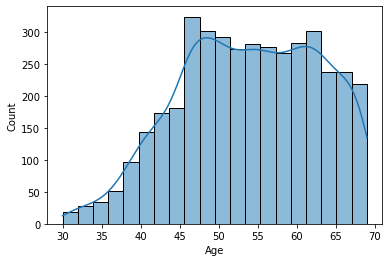

In [ ]:
sns.histplot(data['Age'], bins=20, kde=True)


<AxesSubplot:xlabel='Race', ylabel='count'>

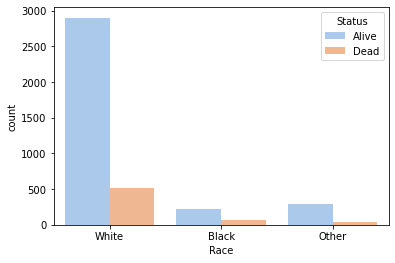

In [21]:
sns.countplot(x='Race', hue='Status', data=data, palette='pastel')


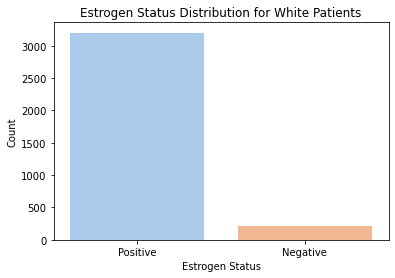

In [ ]:
white_df = data[data['Race'] == 'White']
# Plot Estrogen Status distribution for White race
plt.figure(figsize=(6,4))
sns.countplot(data=white_df, x='Estrogen Status', palette='pastel')
plt.title('Estrogen Status Distribution for White Patients')
plt.xlabel('Estrogen Status')
plt.ylabel('Count')
plt.show()

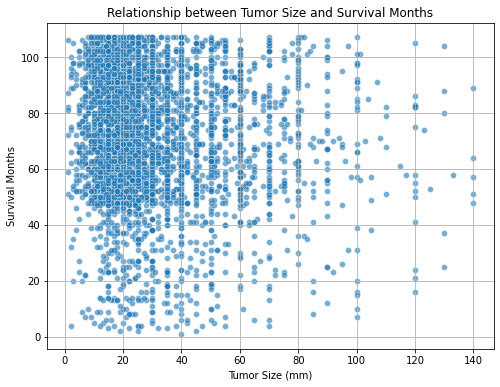

In [19]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=data, x='Tumor Size', y='Survival Months', alpha=0.6)
plt.title('Relationship between Tumor Size and Survival Months')
plt.xlabel('Tumor Size (mm)')
plt.ylabel('Survival Months')
plt.grid(True)
plt.show()

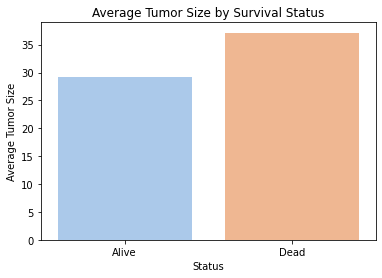

In [22]:
# Calculate average tumor size per status
avg_tumor = data.groupby('Status')['Tumor Size'].mean().reset_index()

# Plot
sns.barplot(x='Status', y='Tumor Size', data=avg_tumor,palette='pastel')
plt.title('Average Tumor Size by Survival Status')
plt.ylabel('Average Tumor Size')
plt.show()

<AxesSubplot:xlabel='Status', ylabel='count'>

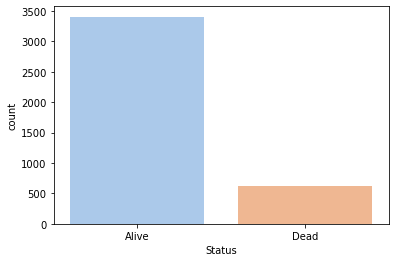

In [23]:
sns.countplot(x="Status", data=data, palette="pastel")
#data not balanced

In [15]:
data.Status.value_counts()

Alive    3407
Dead      616
Name: Status, dtype: int64

Transform Data

In [112]:
la= LabelEncoder()

In [113]:
obj=data.select_dtypes(include=['object']).columns
non_obj=data.select_dtypes(exclude=['object']).columns

In [114]:
# for i in range(0,obj.shape[1]):
#     obj.iloc[:,i]=la.fit_transform(data.iloc[:,i])

In [115]:
for col in obj:
    data[col] = la.fit_transform(data[col].astype(str))

In [116]:
data

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,2,1,0,0,0,1,3,1,4,1,1,24,1,60,0
1,50,2,1,1,1,2,0,2,1,35,1,1,14,5,62,0
2,58,2,0,2,2,4,0,2,1,63,1,1,14,7,75,0
3,58,2,1,0,0,0,1,3,1,18,1,1,2,1,84,0
4,47,2,1,1,0,1,1,3,1,41,1,1,3,1,50,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4019,62,1,1,0,0,0,0,2,1,9,1,1,1,1,49,0
4020,56,2,0,1,1,2,0,2,1,46,1,1,14,8,69,0
4021,68,2,1,1,0,1,0,2,1,22,1,0,11,3,69,0
4022,58,0,0,1,0,1,0,2,1,44,1,1,11,1,72,0


In [117]:
print(data.dtypes)


Age                       int64
Race                      int32
Marital Status            int32
T Stage                   int32
N Stage                   int32
6th Stage                 int32
differentiate             int32
Grade                     int32
A Stage                   int32
Tumor Size                int64
Estrogen Status           int32
Progesterone Status       int32
Regional Node Examined    int64
Reginol Node Positive     int64
Survival Months           int64
Status                    int32
dtype: object


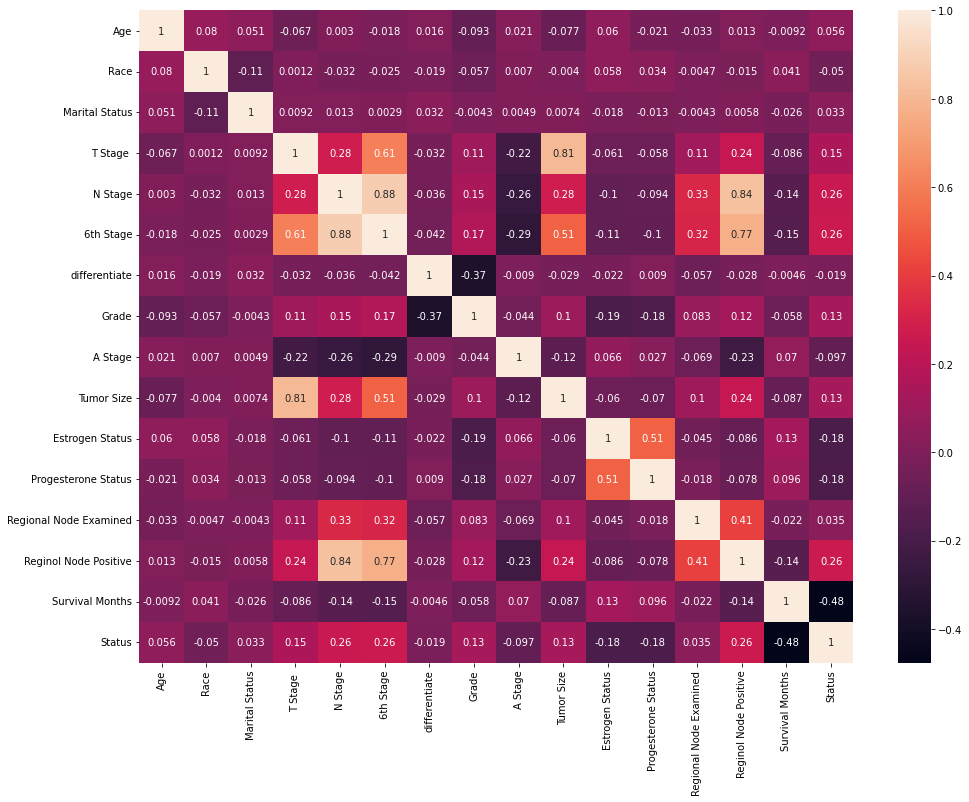

In [118]:
corr_matrix = data.corr()
f, ax = plt.subplots(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [ ]:
X = data.drop(columns=['Status'])
y = data['Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)

importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)

print(importances)

Survival Months           0.374707
Age                       0.124087
Tumor Size                0.102586
Regional Node Examined    0.102378
Reginol Node Positive     0.075505
Marital Status            0.039904
6th Stage                 0.030719
N Stage                   0.025746
T Stage                   0.024011
Progesterone Status       0.023440
Race                      0.021341
Grade                     0.021224
differentiate             0.016967
Estrogen Status           0.013592
A Stage                   0.003795
dtype: float64


In [ ]:
cols_to_drop = ['differentiate', 'Estrogen Status', 'A Stage']  
df_cleaned = data.drop(columns=cols_to_drop)

Create Model

In [121]:
x= df_cleaned.drop(['Status'], axis=1)
y= df_cleaned['Status']

In [122]:
#we need to balance the dataset by decreasing the number of majority class samples or increasing the number of minority class samples
rs=RandomOverSampler(random_state=42)
x_res,y_res=rs.fit_resample(x,y)


In [123]:
x_train, x_test, y_train, y_test = train_test_split(x_res, y_res, test_size=0.2, random_state=42)

In [ ]:
model1=LogisticRegression()
model2=RandomForestClassifier()
model4=XGBRFClassifier()

In [125]:
def pred(model):
    model.fit(x_train, y_train)
    y_pred=model.predict(x_test)
    
    print("Accuracy: ", accuracy_score(y_test, y_pred))
    print("Precision: ", precision_score(y_test, y_pred))
    print("Recall: ", recall_score(y_test, y_pred))
    print("F1 Score: ", f1_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))

In [126]:
pred(model1)

Accuracy:  0.7960381511371973
Precision:  0.8270799347471451
Recall:  0.7466863033873343
F1 Score:  0.7848297213622292
              precision    recall  f1-score   support

           0       0.77      0.85      0.81       684
           1       0.83      0.75      0.78       679

    accuracy                           0.80      1363
   macro avg       0.80      0.80      0.80      1363
weighted avg       0.80      0.80      0.80      1363



In [127]:
pred(model2)

Accuracy:  0.9735876742479824
Precision:  0.9560283687943263
Recall:  0.9926362297496318
F1 Score:  0.9739884393063585
              precision    recall  f1-score   support

           0       0.99      0.95      0.97       684
           1       0.96      0.99      0.97       679

    accuracy                           0.97      1363
   macro avg       0.97      0.97      0.97      1363
weighted avg       0.97      0.97      0.97      1363



In [129]:
pred(model4)

Accuracy:  0.822450476889215
Precision:  0.895117540687161
Recall:  0.7290132547864506
F1 Score:  0.8035714285714286
              precision    recall  f1-score   support

           0       0.77      0.92      0.84       684
           1       0.90      0.73      0.80       679

    accuracy                           0.82      1363
   macro avg       0.83      0.82      0.82      1363
weighted avg       0.83      0.82      0.82      1363

